In [1]:
# Import necessary libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')
from src.oil_analysis_utils import load_and_process_data, analyze_time_series,load_and_process_data,analyze_time_series, analyze_event_periods, calculate_max_drawdown,identify_structural_breaks
%matplotlib inline

In [2]:
df = pd.read_csv('../data/BrentOilPrices.csv')
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
# Load and verify the data
df = load_and_process_data('../data/BrentOilPrices.csv')

Sample of dates before conversion:
0    20-May-87
1    21-May-87
2    22-May-87
3    25-May-87
4    26-May-87
Name: Date, dtype: object

Unique date formats in the dataset:
['20-May-87' '21-May-87' '22-May-87' '25-May-87' '26-May-87']
First attempt failed with error: time data "Apr 22, 2020" doesn't match format "%d-%b-%y", at position 8360. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


c:\Users\hp\Documents\BrentOilPriceAnalysis\notebook\..\src\oil_analysis_utils.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [4]:
# Display the first few rows and basic information
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Price,Returns,Volatility
Date,,,
1987-05-20,18.63,NaN,NaN
1987-05-21,18.45,-0.009662,NaN
1987-05-22,18.55,0.005420,NaN
1987-05-25,18.60,0.002695,NaN
1987-05-26,18.63,0.001613,NaN


In [5]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       9011 non-null   float64
 1   Returns     9010 non-null   float64
 2   Volatility  8991 non-null   float64
dtypes: float64(3)
memory usage: 281.6 KB


None

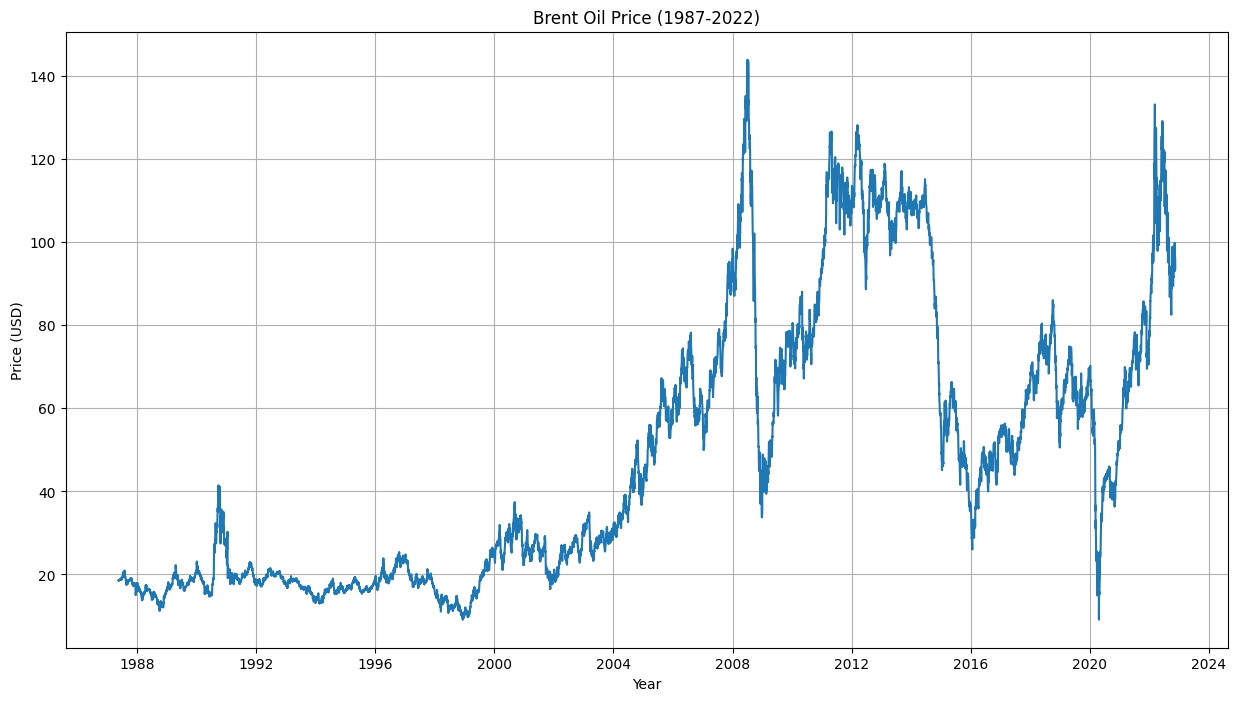

In [6]:
# Plot the oil price time series
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Price'])
plt.title('Brent Oil Price (1987-2022)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Frequency')

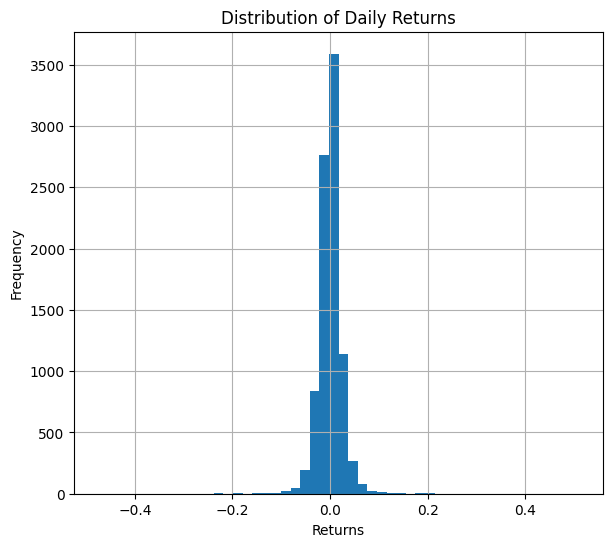

In [7]:
# Plot returns distribution
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
df['Returns'].hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

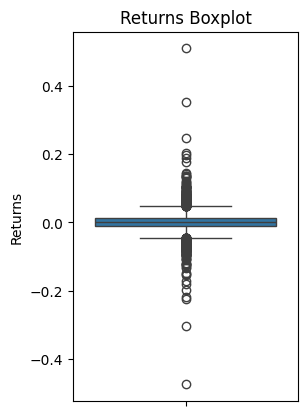

In [8]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Returns'])
plt.title('Returns Boxplot')
plt.show()

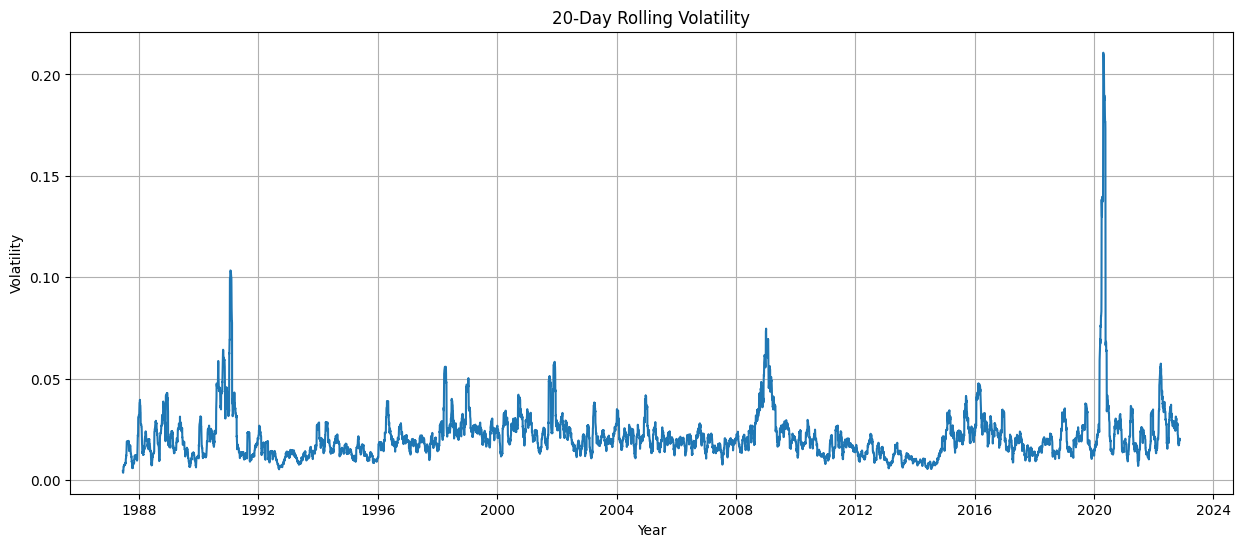

In [9]:
# Plot volatility over time
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Volatility'])
plt.title('20-Day Rolling Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

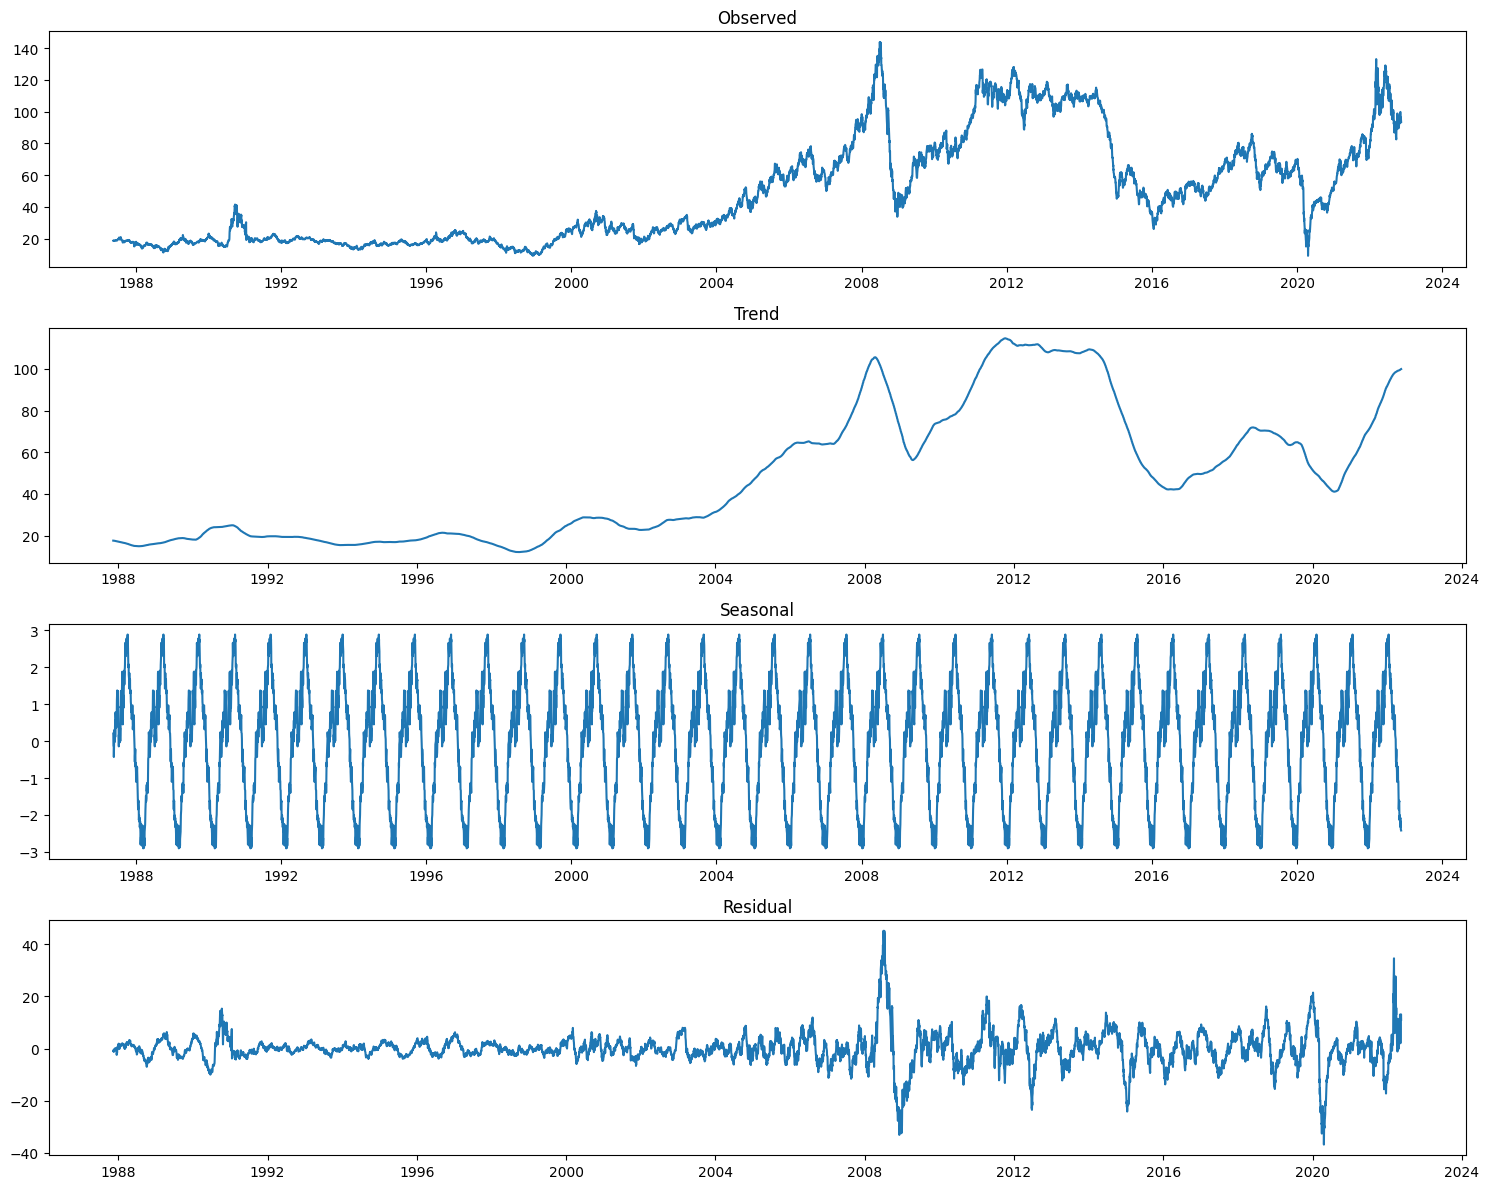

In [10]:
# Perform time series decomposition
decomposition, adf_result, stats = analyze_time_series(df)
# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
ax1.plot(decomposition.observed)
ax1.set_title('Observed')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

In [11]:
# Print statistical results
print("Summary Statistics:")
display(stats)

Summary Statistics:


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

In [12]:
print("\nAugmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.9939
p-value: 0.2893


In [13]:
# Define major events periods
event_periods = {
    'Gulf War': ('1990-08-02', '1991-02-28'),
    'Asian Financial Crisis': ('1997-07-01', '1998-12-31'),
    'Dot-com Bubble': ('2000-03-10', '2002-10-09'),
    'Iraq War': ('2003-03-20', '2003-05-01'),
    'Financial Crisis': ('2008-09-15', '2009-03-31'),
    'Arab Spring': ('2010-12-18', '2012-12-31'),
    'Oil Price Crash': ('2014-06-01', '2015-12-31'),
    'COVID-19 Impact': ('2020-03-01', '2020-04-30'),
    'Russia-Ukraine Conflict': ('2022-02-24', '2022-09-30')
}

In [14]:
# Analyze event periods
event_analysis = analyze_event_periods(df, event_periods)

# Display event analysis results
print("Event Period Analysis:")
display(event_analysis)

Event Period Analysis:


c:\Users\hp\Documents\BrentOilPriceAnalysis\notebook\..\src\oil_analysis_utils.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'price_change': (period_data['Price'][-1] - period_data['Price'][0]) / period_data['Price'][0] * 100,


,avg_price,price_volatility,price_change,max_drawdown,avg_daily_volume
Gulf War,29.084228,0.892422,-12.359551,-57.346200,3.822739
Asian Financial Crisis,14.691538,0.432645,-44.025491,-57.256928,1.953693
Dot-com Bubble,25.898258,0.433902,-2.347256,-55.890997,2.018758
Iraq War,25.537742,0.469245,-15.035714,-17.183601,2.206786
Financial Crisis,53.857372,0.774719,-48.999447,-66.960525,3.691792
Arab Spring,111.091087,0.254805,21.344869,-30.786640,1.198824
Oil Price Crash,67.082871,0.345423,-66.517286,-69.389704,1.538724
COVID-19 Impact,25.759762,2.479220,-65.517898,-82.635187,10.604320
Russia-Ukraine Conflict,108.535364,0.548278,-12.232205,-38.016219,2.657906


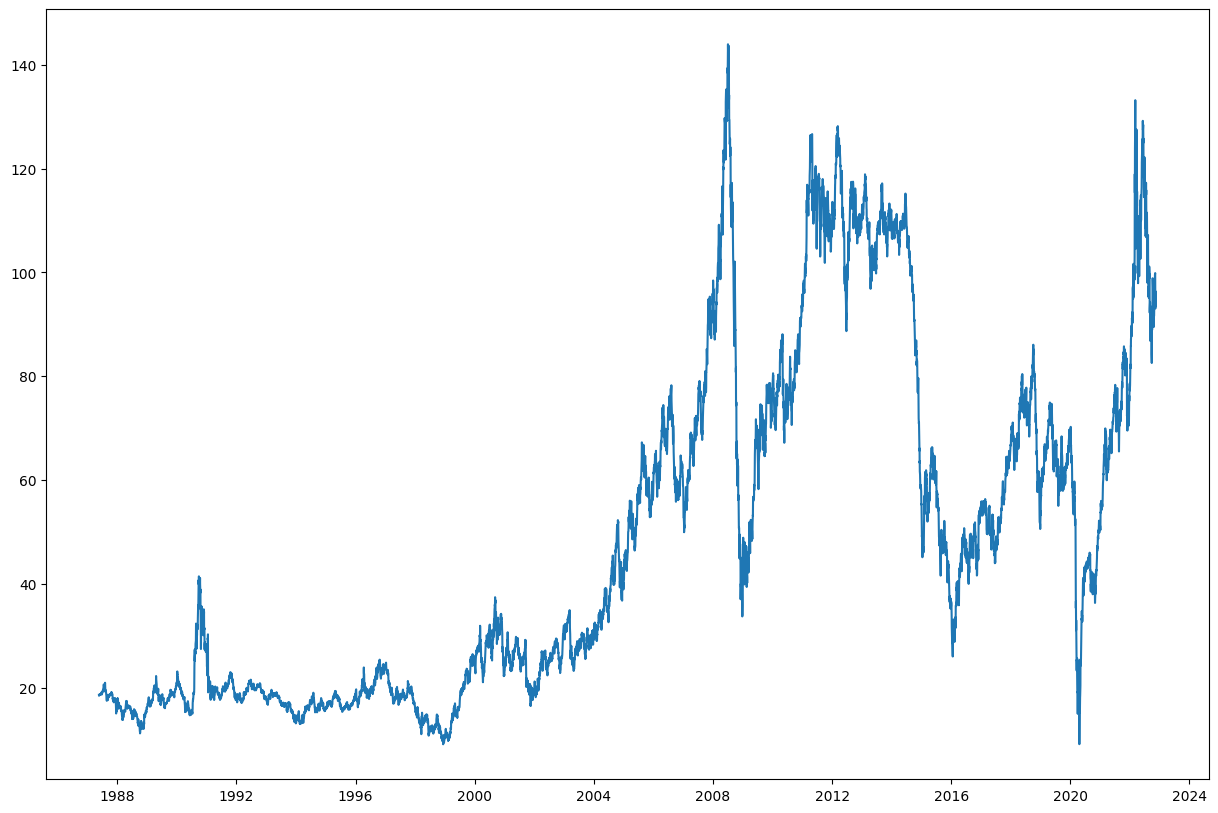

In [15]:
# Plot price evolution during major events
plt.figure(figsize=(15, 10))
plt.plot(df.index, df['Price'], label='Oil Price')

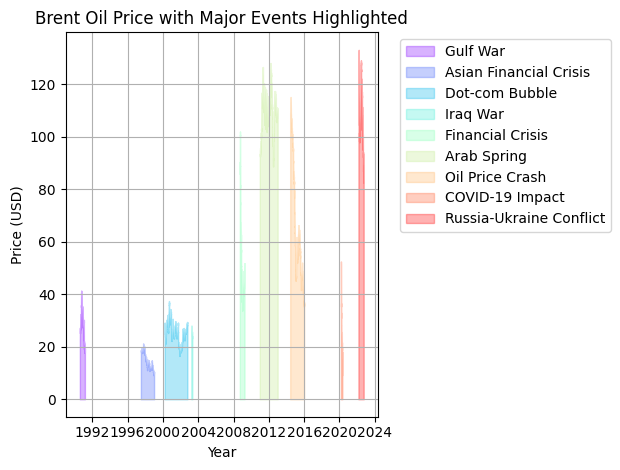

In [16]:
# Highlight event periods
colors = plt.cm.rainbow(np.linspace(0, 1, len(event_periods)))
for (event_name, (start_date, end_date)), color in zip(event_periods.items(), colors):
    mask = (df.index >= start_date) & (df.index <= end_date)
    plt.fill_between(df.index[mask], df['Price'][mask], alpha=0.3, color=color, label=event_name)
plt.title('Brent Oil Price with Major Events Highlighted')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# 2. Define and analyze economic events
economic_events = {
    'Asian Financial Crisis': ('1997-07-01', '1998-12-31'),
    'Dot-com Bubble': ('2000-03-10', '2002-10-09'),
    'Global Financial Crisis': ('2008-09-15', '2009-03-31'),
    'European Debt Crisis': ('2010-05-01', '2012-12-31'),
    'Chinese Stock Market Crash': ('2015-06-12', '2015-08-31'),
    'COVID-19 Pandemic': ('2020-03-01', '2020-04-30')
}

In [23]:
# Analyze economic events impact
economic_analysis = analyze_event_periods(df, economic_events)

c:\Users\hp\Documents\BrentOilPriceAnalysis\notebook\..\src\oil_analysis_utils.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'price_change': (period_data['Price'][-1] - period_data['Price'][0]) / period_data['Price'][0] * 100,


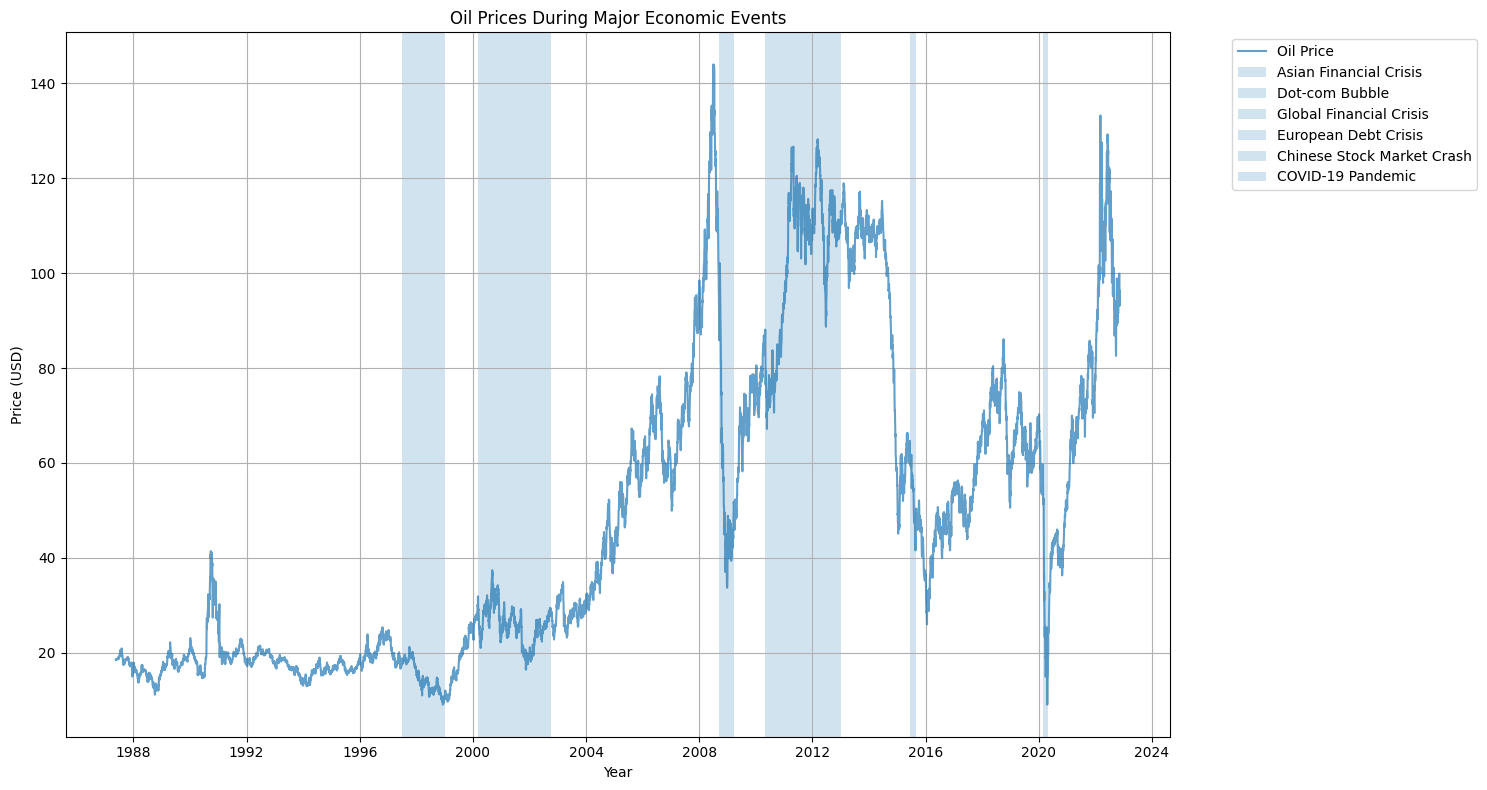

In [24]:
# 2. Economic Events Impact
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Price'], label='Oil Price', alpha=0.7)

for event, (start, end) in economic_events.items():
    mask = (df.index >= start) & (df.index <= end)
    plt.axvspan(start, end, alpha=0.2, label=event)

plt.title('Oil Prices During Major Economic Events')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Identify structural breaks
breaks = identify_structural_breaks(df)

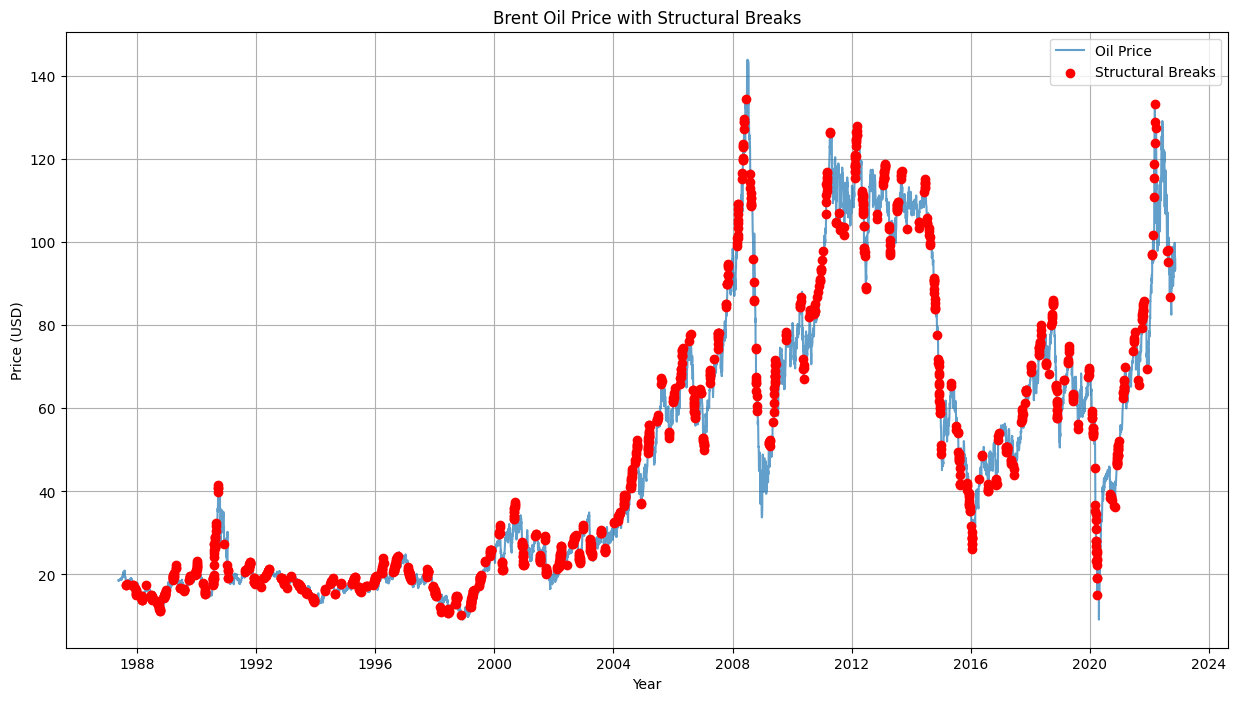

In [18]:
# Plot structural breaks
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Price'], label='Oil Price', alpha=0.7)
plt.scatter(breaks.index, df.loc[breaks.index, 'Price'], 
           color='red', label='Structural Breaks', zorder=5)
plt.title('Brent Oil Price with Structural Breaks')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Calculate summary statistics for different periods
print("\nSummary Statistics by Decade:")
decades = pd.DatetimeIndex(df.index).year // 10 * 10
decade_stats = df.groupby(decades)['Price'].agg(['mean', 'std', 'min', 'max'])
display(decade_stats)


Summary Statistics by Decade:


,mean,std,min,max
Date,,,,
1980,17.032855,2.101754,11.20,22.25
1990,18.353844,4.320738,9.10,41.45
2000,49.461439,25.779562,16.51,143.95
2010,79.346369,26.091393,26.01,128.14
2020,70.602634,27.043348,9.12,133.18


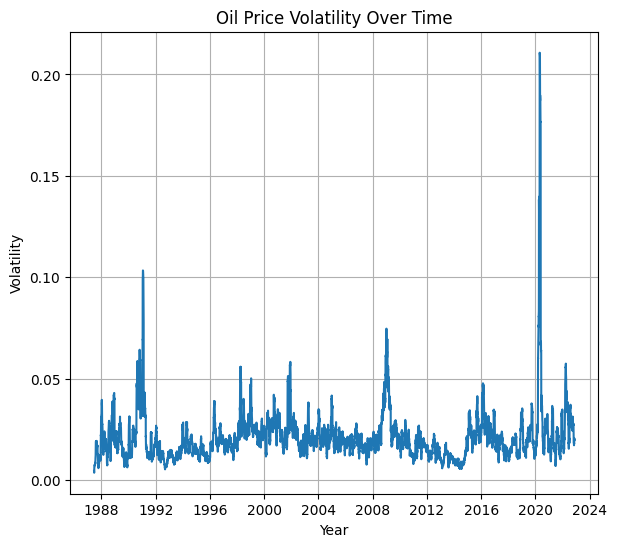

In [20]:
# Volatility clustering analysis
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['Volatility'], label='Volatility')
plt.title('Oil Price Volatility Over Time')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)

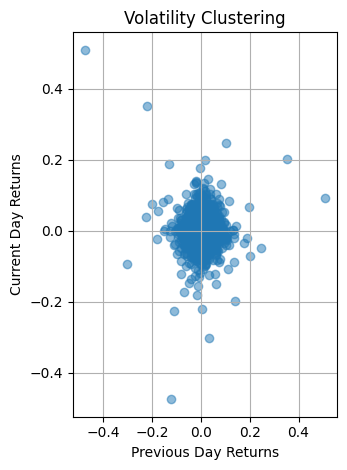

In [21]:
plt.subplot(1, 2, 2)
plt.scatter(df['Returns'].shift(), df['Returns'], alpha=0.5)
plt.title('Volatility Clustering')
plt.xlabel('Previous Day Returns')
plt.ylabel('Current Day Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# 4. Price Recovery Analysis
def analyze_price_recovery(df, events):
    recovery_metrics = {}
    
    for event, (start, end) in events.items():
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        
        # Price at start and minimum during event
        start_price = df.loc[start_date:end_date, 'Price'].iloc[0]
        min_price = df.loc[start_date:end_date, 'Price'].min()
        end_price = df.loc[start_date:end_date, 'Price'].iloc[-1]
        
        recovery_metrics[event] = {
            'Max Drawdown (%)': ((min_price - start_price) / start_price) * 100,
            'Recovery (%)': ((end_price - min_price) / min_price) * 100,
            'Net Change (%)': ((end_price - start_price) / start_price) * 100
        }
    
    return pd.DataFrame(recovery_metrics).T


In [26]:
# Analyze price recovery

political_recovery = analyze_price_recovery(df, event_periods)
economic_recovery = analyze_price_recovery(df, economic_events)

# Display results
print("Price Impact During Political Events:")
display(political_recovery)

print("\nPrice Impact During Economic Events:")
display(economic_recovery)

Price Impact During Political Events:


,Max Drawdown (%),Recovery (%),Net Change (%)
Gulf War,-20.539326,10.294118,-12.359551
Asian Financial Crisis,-51.672862,15.824176,-44.025491
Dot-com Bubble,-43.010010,71.350697,-2.347256
Iraq War,-17.035714,2.410676,-15.035714
Financial Crisis,-62.708679,36.762526,-48.999447
Arab Spring,-2.869346,24.929530,21.344869
Oil Price Crash,-67.751966,3.828701,-66.517286
COVID-19 Impact,-82.635187,98.574561,-65.517898
Russia-Ukraine Conflict,-18.501333,7.692308,-12.232205



Price Impact During Economic Events:


,Max Drawdown (%),Recovery (%),Net Change (%)
Asian Financial Crisis,-51.672862,15.824176,-44.025491
Dot-com Bubble,-43.010010,71.350697,-2.347256
Global Financial Crisis,-62.708679,36.762526,-48.999447
European Debt Crisis,-23.737087,64.930039,25.780452
Chinese Stock Market Crash,-34.182624,15.340226,-24.086090
COVID-19 Pandemic,-82.635187,98.574561,-65.517898
